In [13]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from collections import Counter

# Load the provided Excel file
file_path = '/content/Assignment_Twitter.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,NaN
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,NaN
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,NaN
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,NaN
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,supply


Data Preprocessing

In [14]:
# Function to clean the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Apply the cleaning function to the 'Post' column
df['Cleaned_Post'] = df['Post'].apply(clean_text)
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,NaN,almost every house in this area is using ac bu...
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,NaN,speed of the fan right now is like it is runni...
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,NaN,same problem is still going on and today its h...
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,NaN,and if this continues every electronic device ...
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,supply,grateful for the rapid resolution of the power...


In [15]:
nltk.download('punkt')

# Assuming the text data is in a column named 'text'
text_data = df['Cleaned_Post'].dropna().tolist()

# Function to generate N-grams
def generate_ngrams(text, n):
    words = nltk.word_tokenize(text)
    return list(ngrams(words, n))

# Generate Unigrams, Bigrams, Trigrams, and N-grams
unigrams = Counter()
bigrams = Counter()
trigrams = Counter()
fourgrams = Counter()

for text in text_data:
    unigrams.update(generate_ngrams(text, 1))
    bigrams.update(generate_ngrams(text, 2))
    trigrams.update(generate_ngrams(text, 3))
    fourgrams.update(generate_ngrams(text, 4))

# Display the most common N-grams
print("Most common unigrams:", unigrams.most_common(10))
print("Most common bigrams:", bigrams.most_common(10))
print("Most common trigrams:", trigrams.most_common(10))
print("Most common fourgrams:", fourgrams.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common unigrams: [(('the',), 738), (('is',), 533), (('to',), 425), (('in',), 365), (('and',), 335), (('power',), 312), (('no',), 309), (('are',), 300), (('this',), 295), (('you',), 266)]
Most common bigrams: [(('power', 'cut'), 91), (('we', 'are'), 80), (('there', 'is'), 63), (('for', 'the'), 62), (('more', 'than'), 57), (('in', 'the'), 56), (('the', 'power'), 56), (('in', 'this'), 53), (('this', 'is'), 53), (('power', 'supply'), 48)]
Most common trigrams: [(('there', 'is', 'no'), 33), (('in', 'my', 'area'), 24), (('in', 'our', 'area'), 23), (('power', 'cut', 'in'), 23), (('look', 'into', 'this'), 19), (('for', 'the', 'last'), 18), (('the', 'power', 'cut'), 17), (('is', 'back', 'to'), 14), (('please', 'look', 'into'), 14), (('more', 'than', 'hrs'), 14)]
Most common fourgrams: [(('look', 'into', 'this', 'matter'), 10), (('is', 'back', 'to', 'normal'), 9), (('more', 'than', 'an', 'hour'), 9), (('we', 'are', 'trying', 'our'), 9), (('are', 'trying', 'our', 'best'), 9), (('trying', 'ou

Sentiment Analysis

Hugging Face transformers library is used to perform sentiment analysis.

In [16]:
from transformers import pipeline

# Load the pre-trained sentiment-analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Predict sentiment for each cleaned tweet
df['Predicted_Sentiment'] = df['Cleaned_Post'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Map the sentiment labels to predefined categories
sentiment_mapping = {
    'POSITIVE': 'Positive',
    'NEGATIVE': 'Negative',
    'NEUTRAL': 'Neutral'  # Note: The model may not output 'NEUTRAL'
}

# Apply the mapping
df['Predicted_Sentiment'] = df['Predicted_Sentiment'].map(sentiment_mapping)

# Display the first few rows to verify the results
df[['Cleaned_Post', 'Predicted_Sentiment']].head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

,Cleaned_Post,Predicted_Sentiment
0,almost every house in this area is using ac bu...,Negative
1,speed of the fan right now is like it is runni...,Negative
2,same problem is still going on and today its h...,Negative
3,and if this continues every electronic device ...,Negative
4,grateful for the rapid resolution of the power...,Positive


In [17]:
# Handle missing values in 'Sentiment' and 'Category' columns
#df['Sentiment'].fillna('Unknown', inplace=True)
#df['Category'].fillna('Unknown', inplace=True)

# Function to categorize the posts
def categorize_post(text):
    text = text.lower()
    if any(keyword in text for keyword in ['supply', 'power cut', 'no power', 'outage']):
        return 'Supply'
    elif any(keyword in text for keyword in ['voltage', 'low voltage', 'high voltage', 'fluctuation']):
        return 'Voltage'
    else:
        return 'Other'

# Apply the categorization function to each post
df['Category'] = df['Cleaned_Post'].apply(categorize_post)
df.head()


,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post,Predicted_Sentiment
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,Other,almost every house in this area is using ac bu...,Negative
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,Other,speed of the fan right now is like it is runni...,Negative
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,Other,same problem is still going on and today its h...,Negative
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,Other,and if this continues every electronic device ...,Negative
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,Supply,grateful for the rapid resolution of the power...,Positive


In [23]:
df.tail()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post,Predicted_Sentiment
777,1780330000000000000,@zorro74733061,2024-04-17 01:37:00,X,"@CESCLimited 30 mins any ""proactiveness""? Caus...",Negative,Other,mins any proactiveness cause and estimate,Negative
778,1780340000000000000,@zorro74733061,2024-04-17 02:08:00,X,@CESCLimited Past 2 AM... more than 3 hrs...he...,Negative,Other,past am more than hrshello proactiveness atl...,Negative
779,1781810000000000000,@zorro74733061,2024-04-21 03:49:00,X,@CESCLimited 4th time in 4 days.... congrats o...,NaN,Supply,th time in days congrats on ur repeated failu...,Negative
780,1781830000000000000,@zorro74733061,2024-04-21 05:25:00,X,"@CESCLimited Unfortunately ur ""relentless"" tea...",NaN,Other,unfortunately ur relentless team couldnt even ...,Negative
781,1781840000000000000,@zorro74733061,2024-04-21 05:29:00,X,@CESCLimited @DrSanjivGoenka Ur team is workin...,NaN,Other,ur team is working from last four days if not...,Negative


In [19]:
# Display the first few rows to verify the results
df[['Post', 'Cleaned_Post', 'Predicted_Sentiment', 'Category']].head()

,Post,Cleaned_Post,Predicted_Sentiment,Category
0,"Almost every house in this area is using AC, b...",almost every house in this area is using ac bu...,Negative,Other
1,@CESCLimited speed of the fan right now is lik...,speed of the fan right now is like it is runni...,Negative,Other
2,@CESCLimited Same problem is still going on. A...,same problem is still going on and today its h...,Negative,Other
3,@CESCLimited And if this continues every elect...,and if this continues every electronic device ...,Negative,Other
4,@CESCLimited Grateful for the rapid resolution...,grateful for the rapid resolution of the power...,Positive,Supply


In [24]:
df[['Post', 'Cleaned_Post', 'Predicted_Sentiment', 'Category']].tail()

,Post,Cleaned_Post,Predicted_Sentiment,Category
777,"@CESCLimited 30 mins any ""proactiveness""? Caus...",mins any proactiveness cause and estimate,Negative,Other
778,@CESCLimited Past 2 AM... more than 3 hrs...he...,past am more than hrshello proactiveness atl...,Negative,Other
779,@CESCLimited 4th time in 4 days.... congrats o...,th time in days congrats on ur repeated failu...,Negative,Supply
780,"@CESCLimited Unfortunately ur ""relentless"" tea...",unfortunately ur relentless team couldnt even ...,Negative,Other
781,@CESCLimited @DrSanjivGoenka Ur team is workin...,ur team is working from last four days if not...,Negative,Other


### Exploratory Data Analysis (EDA)

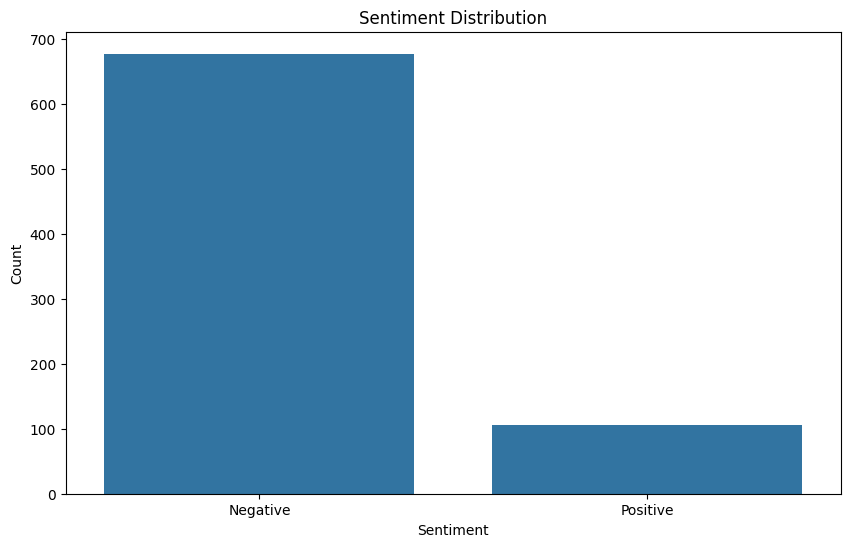

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Predicted_Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

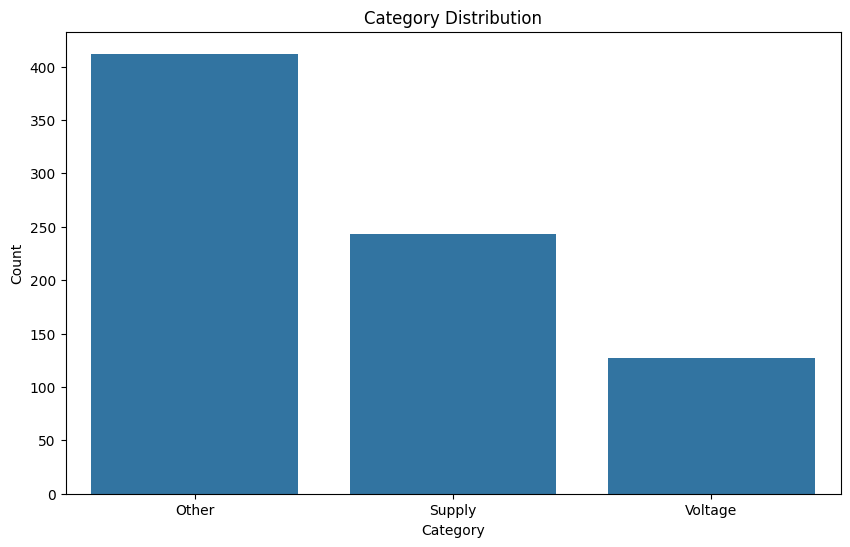

In [25]:
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

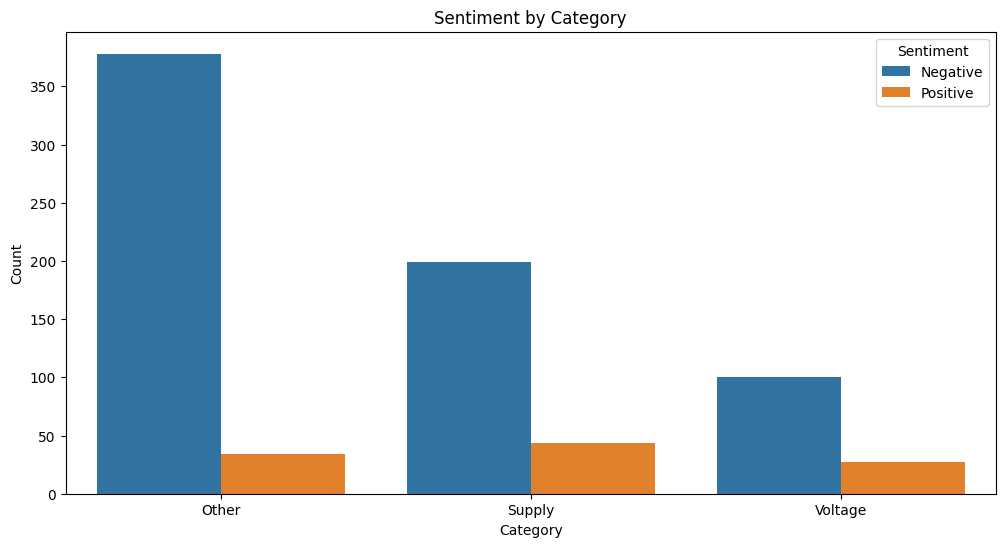

In [26]:
# Sentiment by Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Predicted_Sentiment', data=df)
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post,Predicted_Sentiment
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,0,almost every house in this area is using ac bu...,Negative
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,0,speed of the fan right now is like it is runni...,Negative
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,0,same problem is still going on and today its h...,Negative
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,0,and if this continues every electronic device ...,Negative
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,1,grateful for the rapid resolution of the power...,Positive


Category Classification

Text classification approach, such as Logistic Regression,is used to categorize the tweets.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['Cleaned_Post']).toarray()

y = df['Category']

In [30]:
y

0      0
1      0
2      0
3      0
4      1
      ..
777    0
778    0
779    1
780    0
781    0
Name: Category, Length: 782, dtype: int64

In [32]:
X

array([[0.09831157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
# Train a Logistic Regression model for category classification
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the categories on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        90
           1       0.86      0.74      0.79        42
           2       1.00      0.64      0.78        25

    accuracy                           0.84       157
   macro avg       0.89      0.77      0.82       157
weighted avg       0.85      0.84      0.84       157

Accuracy: 84.07643312101911


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model for category classification
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict the categories on the test set
y_pred_dtc = dtc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_dtc))
print("Accuracy:", accuracy_score(y_test, y_pred_dtc)*100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.93      0.98      0.95        42
           2       1.00      0.96      0.98        25

    accuracy                           0.97       157
   macro avg       0.97      0.97      0.97       157
weighted avg       0.98      0.97      0.97       157

Accuracy: 97.45222929936305


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model for category classification
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict the categories on the test set
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_rfc))
print("Accuracy:", accuracy_score(y_test, y_pred_rfc)*100)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.93      0.93      0.93        42
           2       1.00      0.96      0.98        25

    accuracy                           0.96       157
   macro avg       0.96      0.95      0.96       157
weighted avg       0.96      0.96      0.96       157

Accuracy: 95.54140127388536
